In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/data.yaml
/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/valid/labels/uwg_g-74__flipv_jpg.rf.b52cfe8e1490d57b3281a06af9da0c34.txt
/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/valid/labels/uwg_g-643_jpg.rf.a4e0e1f8bcd6476626de6ee473f953dc.txt
/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/valid/labels/uwg_g-903__flipv_jpg.rf.dc210cf02663a89ac8b2a1155e280869.txt
/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/valid/labels/uwg_g-1252__fliph_jpg.rf.86d99598cdc8494053cf7edb54985561.txt
/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/valid/labels/uwg_yt-217__flipv_png_jpg.rf.89b50aec4754a148f03e13ef0f351ed1.txt
/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/valid/labels/uwg_yt-109__fliph_jpg.rf.9a71f781b5d5f64fe93f6116c7ce9838.txt
/kaggle/input/underwater-plastic-pol

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 14.9 MB/s eta 0:00:00a 0:00:01


In [3]:
!wandb disabled

W&B disabled.


In [4]:
!yolo train model=yolov8n.pt data=/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/data.yaml epochs=100 imgsz=640 batch=32

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100%|██████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 83.9MB/s]
Ultralytics 8.3.107 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

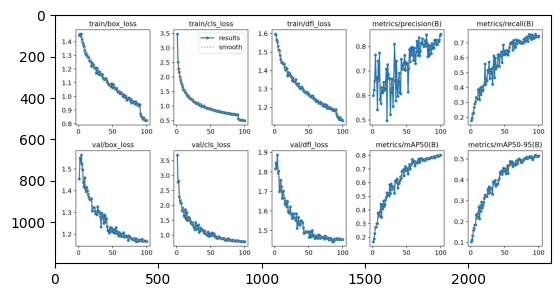

In [6]:
img = mpimg.imread('/kaggle/working/runs/detect/train/results.png')
imgplot = plt.imshow(img)
plt.show()

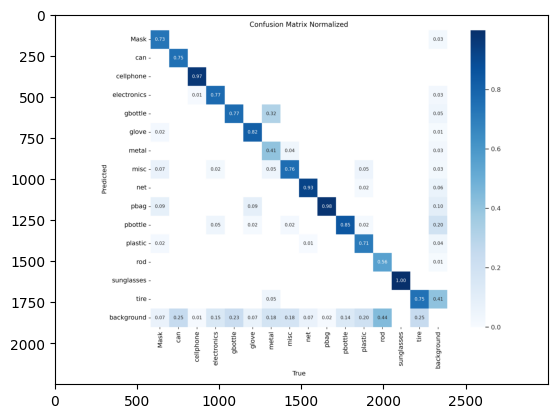

In [7]:
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix_normalized.png')
imgplot = plt.imshow(img)
plt.show()

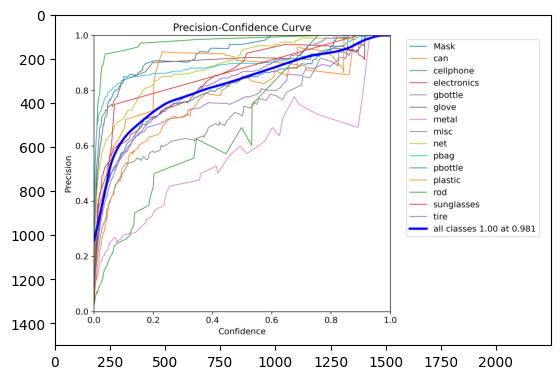

In [8]:
img = mpimg.imread('/kaggle/working/runs/detect/train/P_curve.png')
imgplot = plt.imshow(img)
plt.show()

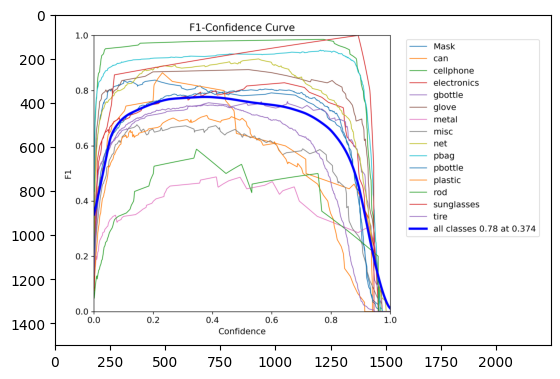

In [9]:
img = mpimg.imread('/kaggle/working/runs/detect/train/F1_curve.png')
imgplot = plt.imshow(img)
plt.show()

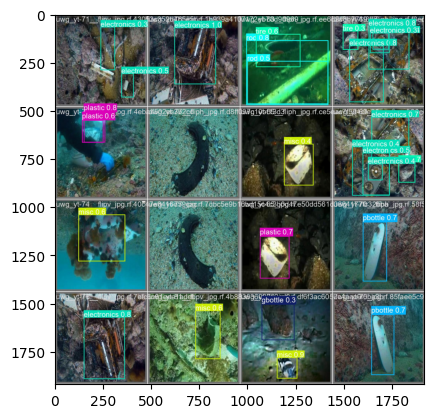

In [10]:
img = mpimg.imread('/kaggle/working/runs/detect/train/val_batch0_pred.jpg')
imgplot = plt.imshow(img)
plt.show()

In [11]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" device=0 source="/kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images" save=True

Ultralytics 8.3.107 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

image 1/501 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/1bc7-iudfmpmn7245599_jpg.rf.c753c3518aa3bd30463da5e4b94a48be.jpg: 640x640 1 glove, 8.4ms
image 2/501 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/200623160205-05-coronavirus-waste-pollution-super-169_jpg.rf.e06b1a6873ec4240c3493f281822c9d9.jpg: 640x640 1 misc, 1 pbottle, 7.4ms
image 3/501 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/66b85ac2-5d1b-4783-b0fa-4f8adcda51a5_jpg.rf.33eb90a2198eccbfbc6e7961b953ac4a.jpg: 640x640 1 Mask, 1 pbag, 1 plastic, 7.3ms
image 4/501 /kaggle/input/underwater-plastic-pollution-detection/underwater_plastics/test/images/7_JPG_jpg.rf.3bf999e1c1e0a9a932b23d95b27357dc.jpg: 640x640 1 Mask, 7.3ms
image 5/501 /kaggle/input/underwater-

In [12]:
from glob import glob
from PIL import Image

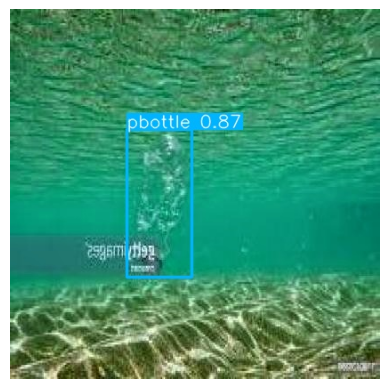

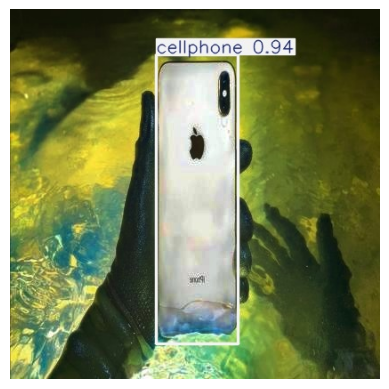

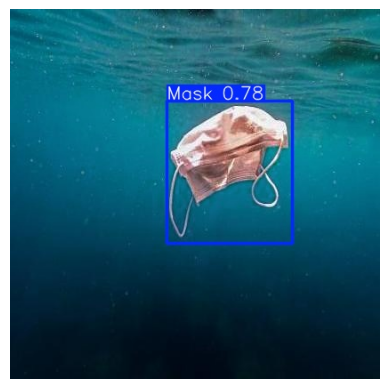

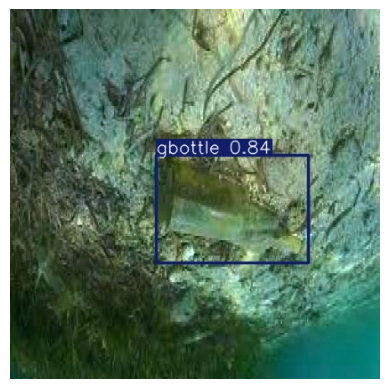

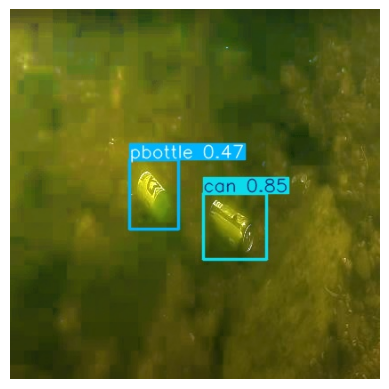

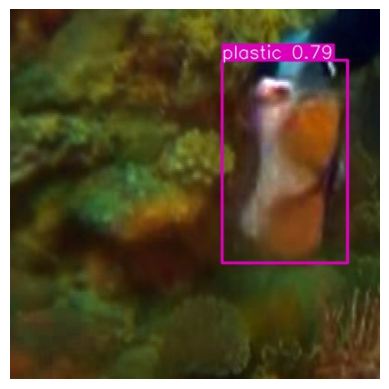

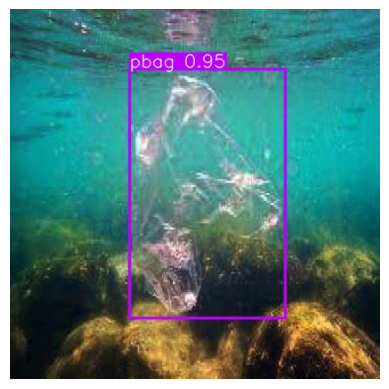

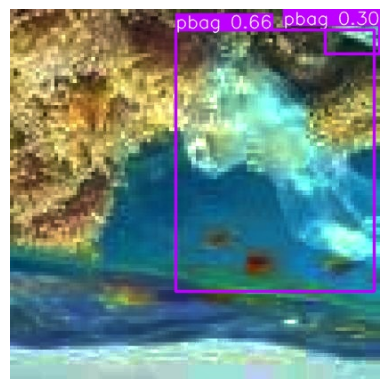

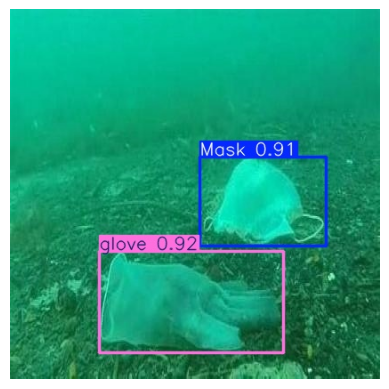

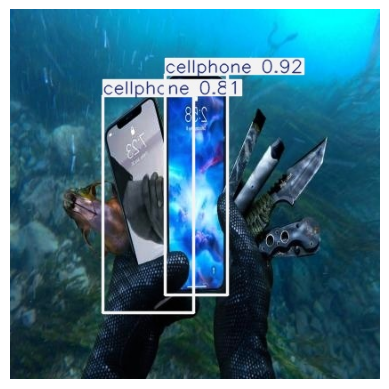

In [13]:
img_path = glob('/kaggle/working/runs/detect/predict/*.jpg')
img_path = np.random.choice(img_path, 10)

for image_path in img_path:
    plt.imshow(Image.open(image_path))
    plt.axis("off")
    plt.show()
    print("\n")

In [15]:
import shutil

# Copy model to working directory
shutil.copy("runs/detect/train/weights/best.pt", "/kaggle/working/best.pt")

'/kaggle/working/best.pt'